<a href="https://colab.research.google.com/github/bcguilherme/basedecreditoregrelinear/blob/main/basedecreditoregrelinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Loading and Preprocessing:


In [ ]:
credito = pd.read_excel('/content/Cópia de Limite_Credito_Dummy.xlsx')
credito.head()


,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


Explanation: This code reads data from an Excel file ('Cópia de Limite_Credito_Dummy.xlsx') into a pandas DataFrame named credito. The head() method is then used to display the first few rows of the DataFrame for a quick overview.

Label Encoding:


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

credito['Escolaridade'] = le.fit_transform(credito['Escolaridade'])

credito['Gênero'] = le.fit_transform(credito['Gênero'])

credito['Região'] = le.fit_transform(credito['Região'])






Explanation: Here, Label Encoding is applied to convert categorical variables ('Escolaridade', 'Gênero', and 'Região') into numerical values. This is useful for machine learning models that require numerical input.

In [ ]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


Data Visualization with Seaborn:


<Axes: xlabel='LimitedoChequeEspecial', ylabel='Count'>

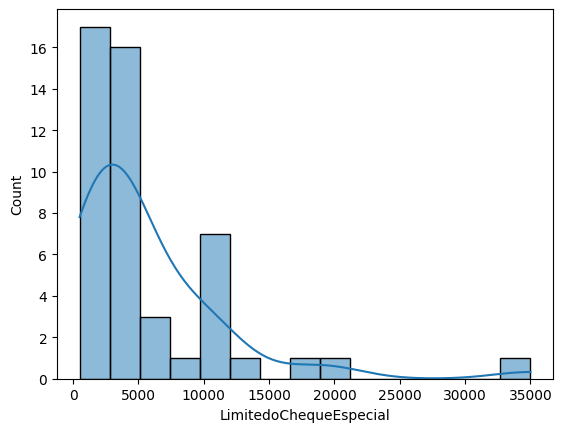

In [ ]:
sns.histplot(credito, x='LimitedoChequeEspecial', kde=True)

Explanation: This code uses Seaborn to create a histogram plot of the 'LimitedoChequeEspecial' column, showing the distribution of values. The kde=True adds a Kernel Density Estimate plot for a smooth representation of the distribution.


In [ ]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


Data Normalization with Min-Max Scaling:


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

credito_norm = pd.DataFrame(scaler.fit_transform(credito), index=credito.index, columns=credito.columns)
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Explanation: The Min-Max Scaling technique is applied to normalize the data. It scales the values to a specified range (usually [0, 1]). The normalized data is stored in a new DataFrame named credito_norm, and the describe() method is used to show statistical summary information.


Linear Regression Modeling with Statsmodels:


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd


function = 'LimitedoChequeEspecial ~ Idade + RendimentoTotal + Salario + LimitedeCreditoImediato + Escolaridade + Gênero + Região'


model = smf.ols(formula=function, data=credito_norm).fit()


print(model.summary())



                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Sat, 26 Aug 2023   Prob (F-statistic):           7.44e-17
Time:                            15:14:39   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Explanation: Statsmodels is used for linear regression modeling. The code defines a linear regression formula using various features, fits the model to the normalized data, and prints a summary of the regression results, including coefficients and statistical metrics.


In [ ]:
import statsmodels.formula.api as smf
import pandas as pd


function = 'LimitedoChequeEspecial ~  + RendimentoTotal + Salario + LimitedeCreditoImediato + Escolaridade + Gênero + Região'


model = smf.ols(formula=function, data=credito_norm).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Sat, 26 Aug 2023   Prob (F-statistic):           9.97e-18
Time:                            15:15:38   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd


function = 'LimitedoChequeEspecial ~  + RendimentoTotal + Salario + Escolaridade + Gênero + Região'


model = smf.ols(formula=function, data=credito_norm).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Sat, 26 Aug 2023   Prob (F-statistic):           1.39e-18
Time:                            15:16:26   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd


function = 'LimitedoChequeEspecial ~  + RendimentoTotal + Salario +  Gênero + Região -1'


model = smf.ols(formula=function, data=credito_norm).fit()


print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.927
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              138.9
Date:                    Sat, 26 Aug 2023   Prob (F-statistic):                    2.37e-24
Time:                            15:17:52   Log-Likelihood:                          65.092
No. Observations:                      48   AIC:                                     -122.2
Df Residuals:                          44   BIC:                                     -114.7
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.9

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd


function = 'LimitedoChequeEspecial ~  +  Salario +  Gênero + Região'


model = smf.ols(formula=function, data=credito_norm).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Sat, 26 Aug 2023   Prob (F-statistic):           3.24e-20
Time:                            15:17:10   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

Linear Regression Modeling (Alternative Formulas):


In [ ]:
x = credito_norm[['Salario','Gênero','Região']]
y = credito_norm[['LimitedoChequeEspecial']]

Linear Regression with scikit-learn:


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=42)

lr = LinearRegression()

lr.fit(x, y)

LinearRegression()



LinearRegression()

Explanation: These blocks repeat the linear regression modeling process with alternative combinations of features, removing or adding some predictors to observe the impact on the model.


In [ ]:
r_sqr = lr.score(x, y)
r_sqr

0.8791882143098557

In [ ]:
y_pred_treino = lr.predict(x_treino)

print('MAE:', metrics.mean_absolute_error(y_treino,y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino,y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE: 0.03535260038720454
MSE: 0.0024122510423403173
RMSE: 0.04911467237333786


In [ ]:
y_pred_teste = lr.predict(x_teste)

print('MAE:', metrics.mean_absolute_error(y_teste,y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste,y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE: 0.06543044287056327
MSE: 0.008770831909357938
RMSE: 0.09365271971148482


Explanation: This section performs linear regression using scikit-learn. It splits the data into training and testing sets, fits a linear regression model to the training data, and evaluates the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) on both the training and test sets.